# Imports

In [1]:
# Data Processing

import numpy as np
import pandas as pd

# ML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Data-viz
import matplotlib.pyplot as plt
import seaborn as sns

# MlFlow

import mlflow

sns.set(style='darkgrid', palette='deep')


## Get data

In [2]:
df_tennis = pd.read_csv("../data/processed/tennis_merged.csv")

In [3]:
df_tennis.isnull().sum()

product_price                  0
product_original_price         0
product_star_rating            0
product_num_ratings            0
product_minimum_offer_price    0
is_prime                       0
climate_pledge_friendly        0
has_variations                 0
coupon_discount                0
sales_volume                   0
dtype: int64

### Split train and test

In [4]:
cols = list(df_tennis.columns)

input_cols = cols
input_cols.remove("sales_volume")
output_cols = ["sales_volume"]

In [5]:
df_tennis.shape

(310, 10)

In [6]:
X = df_tennis[input_cols]
y = df_tennis[output_cols]

In [7]:
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_raw, y_train_raw, train_size=0.66)

In [8]:
X_train.shape

(163, 9)

### Data Visualization

In [9]:
df_input = df_tennis.copy().drop(labels=["sales_volume"], axis=1)

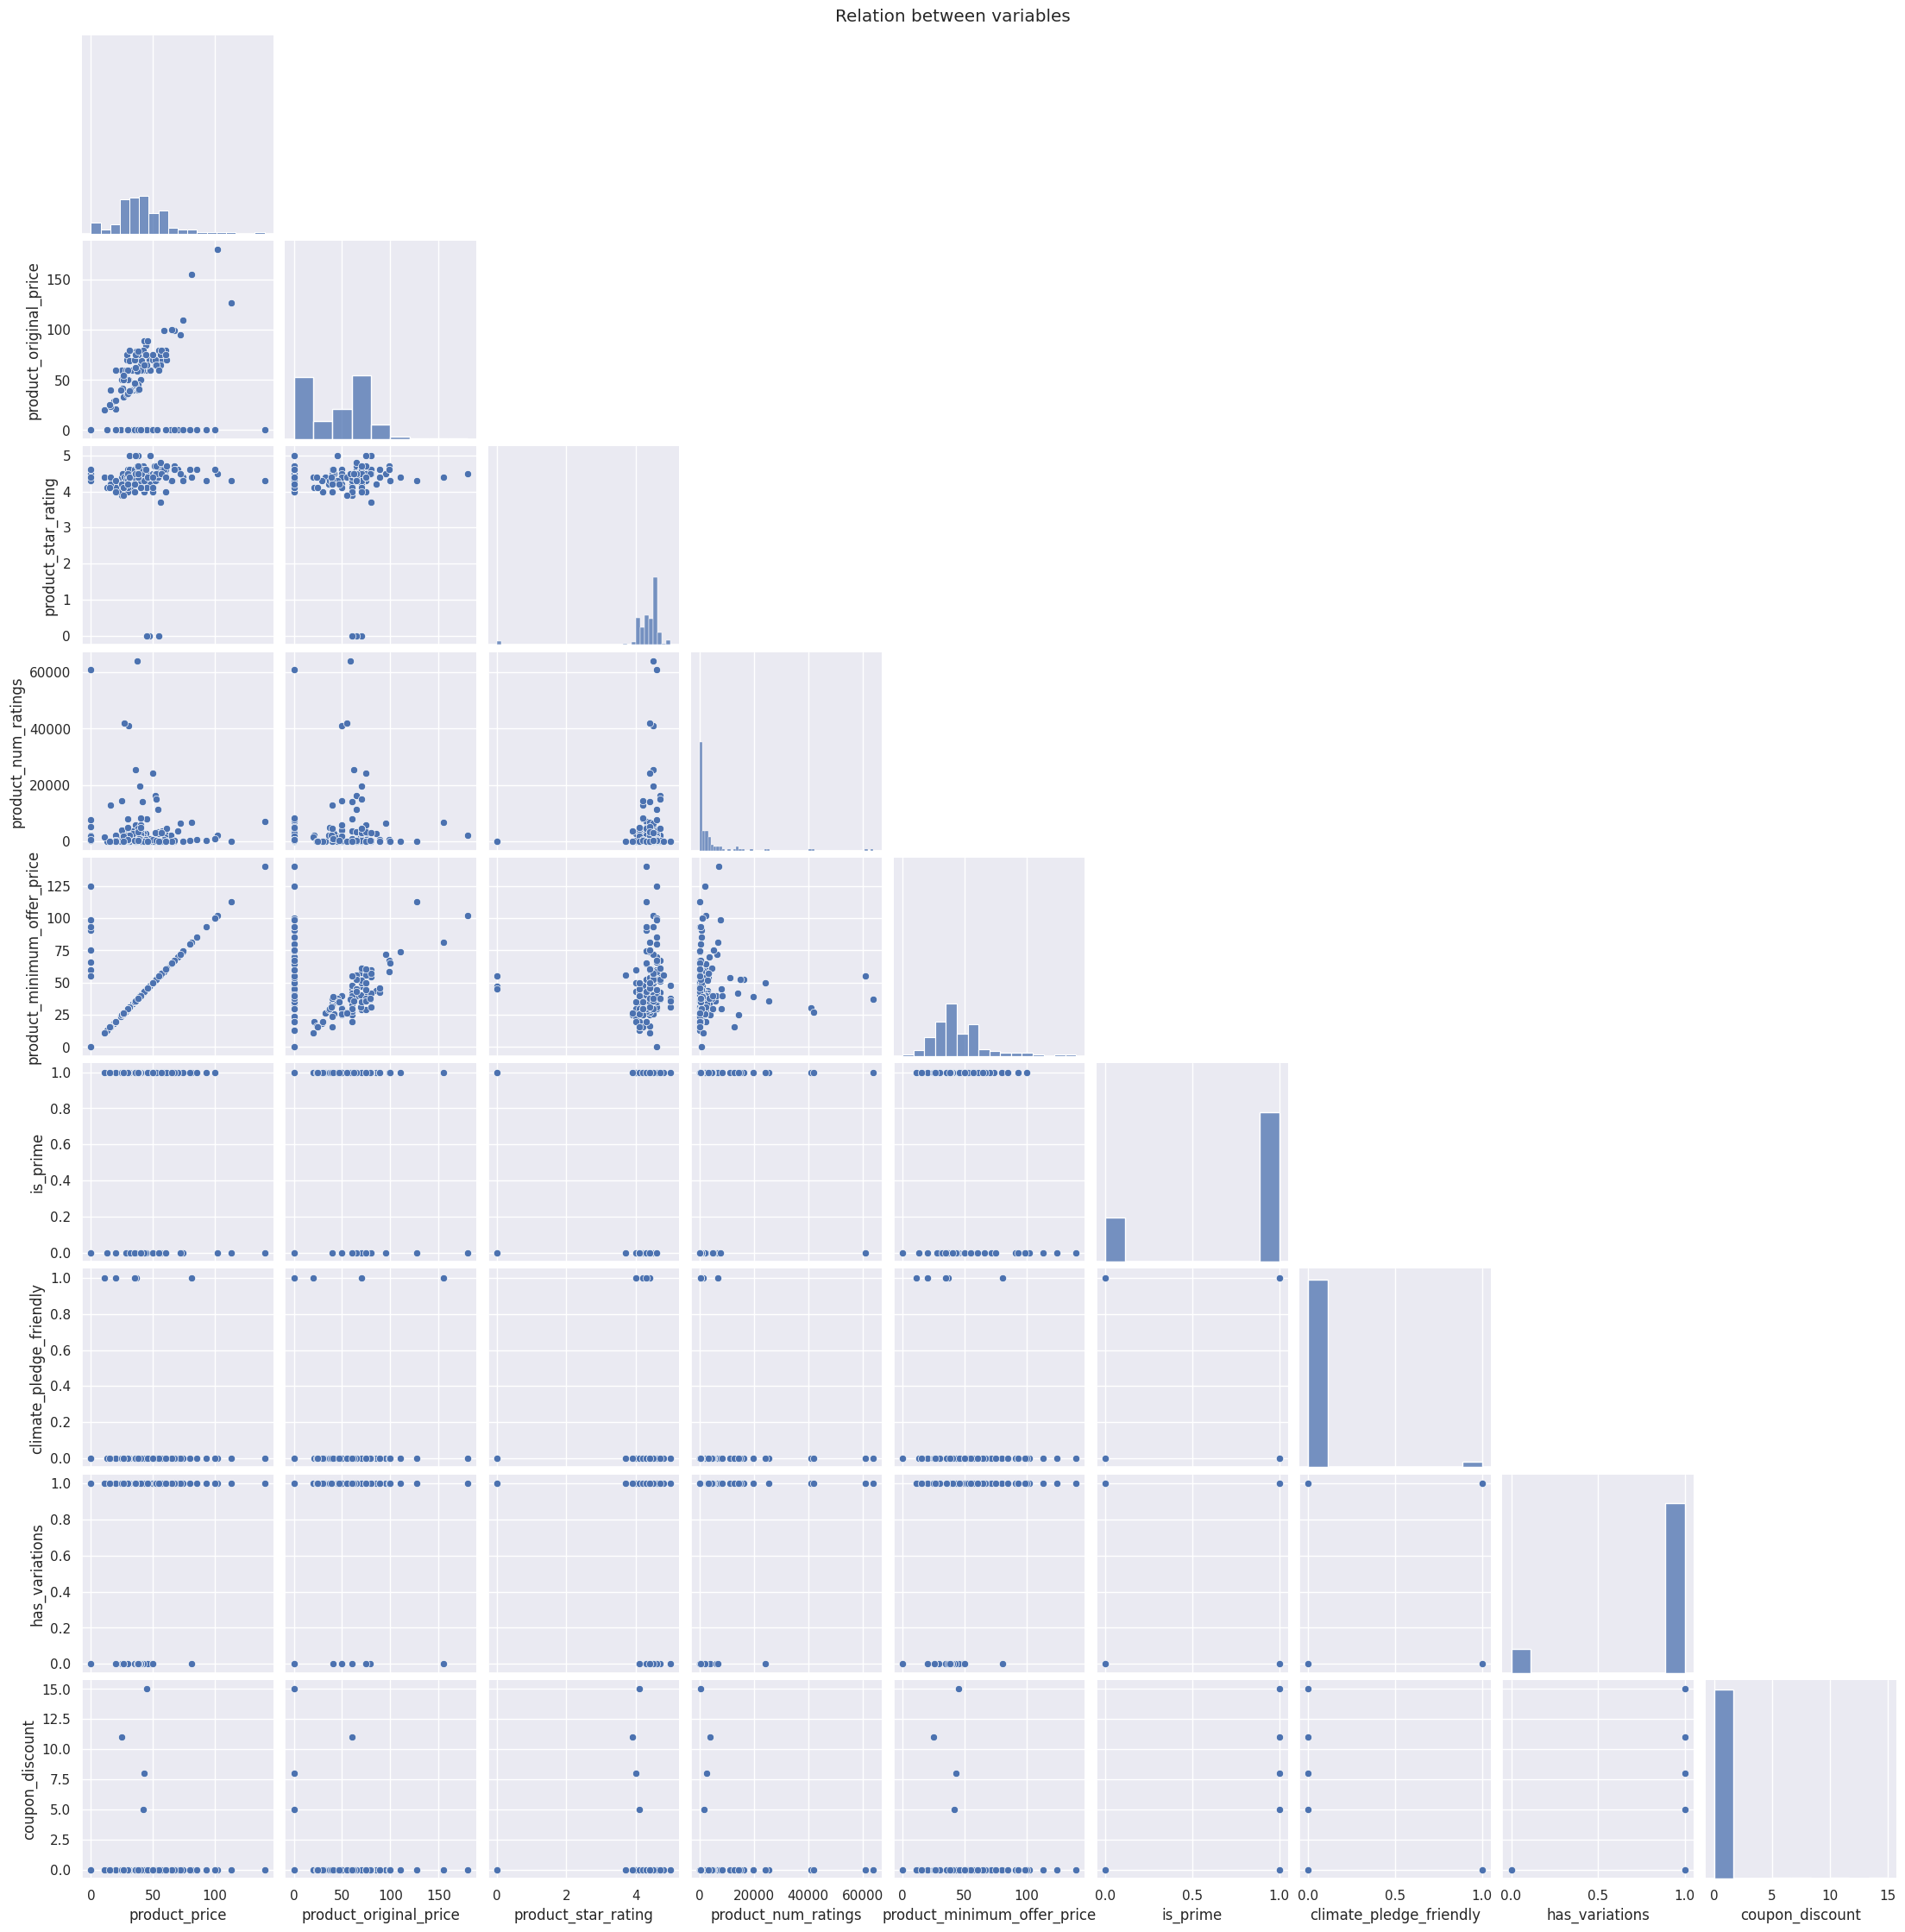

In [10]:

g = sns.pairplot(data=X_train, corner=True)

g.fig.suptitle("Relation between variables", y=1.0)


plt.show()

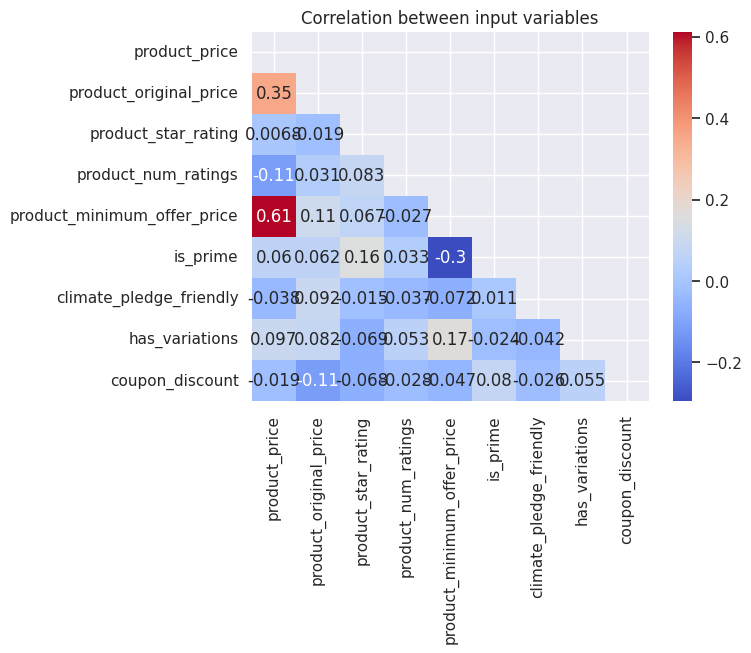

In [11]:
plt.title("Correlation between input variables")
sns.heatmap(data=X_train.corr(), cmap="coolwarm", mask=np.triu(X_train.corr()), annot=True)
plt.show()

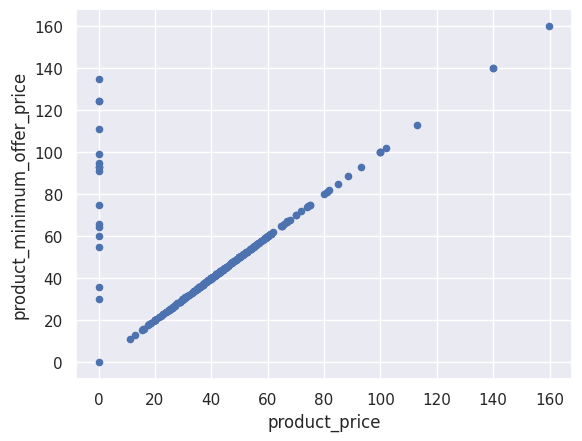

In [12]:
df_input.plot.scatter(x="product_price", y="product_minimum_offer_price")
plt.show()

In counterpart to the correlation between `product_minimum_offer_price` and `product_start_rating`:

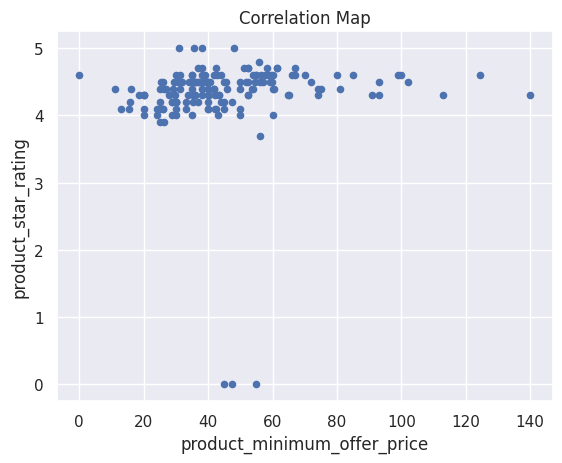

In [13]:
X_train.plot.scatter(
    x="product_minimum_offer_price",
    y="product_star_rating",
)
plt.title("Correlation Map")
plt.show()

In [14]:
X_train.drop(labels=["product_original_price", "product_minimum_offer_price"], axis=1, inplace=True)
X_val.drop(labels=["product_original_price", "product_minimum_offer_price"], axis=1, inplace=True)
X_test.drop(labels=["product_original_price", "product_minimum_offer_price"], axis=1, inplace=True)

In [15]:
# TODO: Test linearity to use Linear Regression (1.5H)

linear_regressor = LinearRegression()
linear_regressor.fit(
    X=X_train,
    y=y_train
)

LinearRegression()

In [16]:
y_pred = linear_regressor.predict(X_val)

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [19]:
mean_squared_error(y_pred=y_pred, y_true=y_val)

np.float64(15380.068382802716)

In [22]:
root_mean_squared_error(y_pred=y_pred, y_true=y_val)

np.float64(124.01640368436232)

In [17]:
# TODO: Test Linear Model (1H)

In [ ]:
# TODO: Report Metrics (1H)

In [ ]:
# TODO: Use MLFLOW (2H)